<a href="https://colab.research.google.com/github/lisatwyw/survival/blob/main/SDA_SEER_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Contents

- SEER dataset subsets:
  - Cancer epidemiology for Arizona [USCS](https://www.cdc.gov/cancer/uscs/USCS-1999-2018-ASCII.zip)
  - SEERStat: extract your own!
  - 

# Setup: Mount drive and install packages

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

subdir='surv'

try:
  os.mkdir( '/content/drive/My Drive/Colab Notebooks/%s'% subdir )
except: 
  pass  
import os
try:
  os.mkdir( '/content/drive/My Drive/Colab Notebooks/%s'% subdir )
except:
  pass  
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/%s'% subdir )

try:
  os.mkdir( '/content/drive/My Drive/Colab Notebooks/packages'  )
except:
  pass  

Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/Colab Notebooks/packages'

bin				      pandas-1.5.2.dist-info
dateutil			      __pycache__
ecos				      python_dateutil-2.8.2.dist-info
ecos-2.0.12.dist-info		      pytz
_ecos.cpython-38-x86_64-linux-gnu.so  pytz-2022.7.dist-info
extension			      qdldl-0.1.5.post2.dist-info
jedi				      qdldl.cpython-38-x86_64-linux-gnu.so
jedi-0.10.0.dist-info		      scikit_learn-1.1.3.dist-info
joblib				      scikit_learn.libs
joblib-1.2.0.dist-info		      scikit_survival-0.19.0.post1.dist-info
numexpr				      scipy
numexpr-2.8.4.dist-info		      scipy-1.9.3.dist-info
numpy				      scipy.libs
numpy-1.23.0.dist-info		      six-1.16.0.dist-info
numpy.libs			      six.py
osqp				      sklearn
osqp-0.6.2.post8.dist-info	      sksurv
osqppurepy			      threadpoolctl-3.1.0.dist-info
pandas				      threadpoolctl.py


In [3]:
import os, sys 
nb_path = '/content/notebooks'

if 0:
  try:
    os.symlink('/content/drive/My Drive/Colab Notebooks/packages', nb_path)
  except:
    pass 

  sys.path.insert(0,nb_path)

  try:
    import sksurv
  except:
    !pip3 install --target=$nb_path jedi==0.10 numpy==1.23 scikit-survival==0.19 


try:
  import pycox
except:
  !pip3 install scikit-survival pycox 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 26.3 MB/s 
     |████████████████████████████████| 73 kB 3.3 MB/s 
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 41 kB 970 kB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 2.3 MB 49.5 MB/s 
     |████████████████████████████████| 139 kB 69.1 MB/s 
     |████████████████████████████████| 378 kB 61.5 MB/s 
     |████████████████████████████████| 357 kB 77.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
'''
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Requirement already satisfied: scikit-survival in /usr/local/lib/python3.8/dist-packages (0.19.0.post1)
Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.9.3)
Requirement already satisfied: joblib in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.2.0)
Requirement already satisfied: numexpr in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (2.8.4)
Requirement already satisfied: numpy in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.23.0)
Requirement already satisfied: osqp!=0.6.0,!=0.6.1 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (0.6.2.post0)
Requirement already satisfied: pandas>=1.0.5 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.3.5)
Requirement already satisfied: ecos in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (2.0.10)
Requirement already satisfied: scikit-learn<1.2,>=1.1.2 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.1.3)
Requirement already satisfied: qdldl in /usr/local/lib/python3.8/dist-packages (from osqp!=0.6.0,!=0.6.1->scikit-survival) (0.1.5.post2)
Requirement already satisfied: pytz>=2017.3 in /usr/local/lib/python3.8/dist-packages (from pandas>=1.0.5->scikit-survival) (2022.6)
Requirement already satisfied: python-dateutil>=2.7.3 in /usr/local/lib/python3.8/dist-packages (from pandas>=1.0.5->scikit-survival) (2.8.2)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/dist-packages (from python-dateutil>=2.7.3->pandas>=1.0.5->scikit-survival) (1.15.0)
Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.8/dist-packages (from scikit-learn<1.2,>=1.1.2->scikit-survival) (3.1.0)
'''

'\nLooking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/\nRequirement already satisfied: scikit-survival in /usr/local/lib/python3.8/dist-packages (0.19.0.post1)\nRequirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.9.3)\nRequirement already satisfied: joblib in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.2.0)\nRequirement already satisfied: numexpr in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (2.8.4)\nRequirement already satisfied: numpy in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.23.0)\nRequirement already satisfied: osqp!=0.6.0,!=0.6.1 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (0.6.2.post0)\nRequirement already satisfied: pandas>=1.0.5 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.3.5)\nRequirement already satisfied: ecos in /usr/local/lib/python3.8/dist-packages (from sci

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis

from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder, encode_categorical
from sksurv.util import Surv

# Initial exploration: USCS

Details https://github.com/UACC-renedherrera/cancer_epidemiology

Data source: https://www.cdc.gov/cancer/uscs/USCS-1999-2018-ASCII.zip 

In [7]:
# !wget https://www.cdc.gov/cancer/uscs/USCS-1999-2018-ASCII.zip -O uscs
# !unzip USCS-1999-2018-ASCII.zip
!ls 

 BRAINBYSITE.TXT			      ICCCBYSITE.TXT
 breast.csv				      kickstarter.csv
 BYAGE.TXT				      mlpsurv.py
 BYAREA_COUNTY.TXT			      nonparametric.py
 BYAREA.TXT				      pbc.csv
 BYSITE.TXT				      __pycache__
 CHILDBYAGE_ADJ.TXT			      rhc.csv
 CHILDBYAGE_CR.TXT			      SEER.csv
 CHILDBYSITE.TXT			      support2.csv
 colon.csv				      support_parsed.csv
'Data Dictionary USCS ASCII 1999-2018.xlsx'  'support_train_test.h5?raw=true'
 framingham.csv				     'support_train_test.h5?raw=true.1'
 ICCCBYAGE_ADJ.TXT			      USCS-1999-2018-ASCII.zip
 ICCCBYAGE_CR.TXT			      USCS_ascii_input_program_2021.sas


In [16]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False,

In [36]:
from glob import glob

if 0:
  dfs=dict()
  for f in glob('USCS/*TXT'):
    dfs[f] = pd.read_csv(f, sep='|'  )
    print(dfs[f], dfs[f].shape, )  

       AGE AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
0     0-19                     ~                     ~                 ~   
1     0-19                     ~                     ~                 ~   
2     0-19                     ~                     ~                 ~   
3     0-19                     ~                     ~                 ~   
4     0-19                     ~                     ~                 ~   
...    ...                   ...                   ...               ...   
6715   20+                   0.0                   0.0               0.0   
6716   20+                   0.1                   0.1               0.1   
6717   20+                   0.0                   0.0               0.0   
6718   20+                   0.1                   0.1               0.1   
6719   20+                   0.0                   0.0               0.0   

               BEHAVIOR COUNT  POPULATION              SEX  \
0     Benign/Borderline  

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        AGE CI_LOWER CI_UPPER COUNT EVENT_TYPE  POPULATION       RACE   RATE  \
0       1-4      2.2      2.9   191  Mortality     7493614  All Races    2.5   
1       1-4     17.1     19.1  1326  Incidence     7323088  All Races   18.1   
2       1-4      0.6      1.0    57  Mortality     7493614  All Races    0.8   
3       1-4      3.2      4.1   267  Incidence     7323088  All Races    3.6   
4       1-4        ~        ~     ~  Mortality     7493614  All Races      ~   
...     ...      ...      ...   ...        ...         ...        ...    ...   
361489  85+      4.2      6.8    67  Incidence     1249573  All Races    5.4   
361490  85+    132.4    145.5  1751  Mortality     1261064  All Races  138.9   
361491  85+    327.8    348.2  4222  Incidence     1249573  All Races  337.9   
361492   <1      1.0      2.1    31  Mortality     2049753  All Races    1.5   
361493   <1     22.7     27.1   503  Incidence     2028019  All Races   24.8   

           SEX                         

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


           AREA AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
0       Alabama                 359.7                 374.7             367.1   
1       Alabama                 160.6                 170.5             165.5   
2       Alabama                 362.1                 377.1             369.5   
3       Alabama                 160.8                 170.6             165.7   
4       Alabama                 377.7                 392.9             385.2   
...         ...                   ...                   ...               ...   
914851  Wyoming                   2.0                   5.1               3.3   
914852  Wyoming                  18.2                  25.5              21.6   
914853  Wyoming                   1.6                   4.3               2.7   
914854  Wyoming                  16.8                  23.8              20.0   
914855  Wyoming                   3.2                   6.6               4.7   

       COUNT EVENT_TYPE  PO

In [40]:
for f in dfs.keys():
    print(f, dfs[f].keys())


USCS/BRAINBYSITE.TXT Index(['AGE', 'AGE_ADJUSTED_CI_LOWER', 'AGE_ADJUSTED_CI_UPPER',
       'AGE_ADJUSTED_RATE', 'BEHAVIOR', 'COUNT', 'POPULATION', 'SEX', 'SITE',
       'YEAR', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'],
      dtype='object')
USCS/BYAGE.TXT Index(['AGE', 'CI_LOWER', 'CI_UPPER', 'COUNT', 'EVENT_TYPE', 'POPULATION',
       'RACE', 'RATE', 'SEX', 'SITE', 'YEAR'],
      dtype='object')
USCS/BYAREA.TXT Index(['AREA', 'AGE_ADJUSTED_CI_LOWER', 'AGE_ADJUSTED_CI_UPPER',
       'AGE_ADJUSTED_RATE', 'COUNT', 'EVENT_TYPE', 'POPULATION', 'RACE', 'SEX',
       'SITE', 'YEAR', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'],
      dtype='object')
USCS/BYAREA_COUNTY.TXT Index(['STATE', 'AREA', 'AGE_ADJUSTED_CI_LOWER', 'AGE_ADJUSTED_CI_UPPER',
       'AGE_ADJUSTED_RATE', 'COUNT', 'EVENT_TYPE', 'POPULATION', 'RACE', 'SEX',
       'SITE', 'YEAR', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'],
      dtype='object')
USCS/BYSITE.TXT Index(['YEAR', 'RACE', 'SEX', 'SITE', 'EVENT

In [41]:
dfs[f]

,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,ICCC_GROUP,POPULATION,AGE,RACE,SEX,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,142.4,148.6,145.4,8502,All ICCC Groups Combined,58588724,0-14,All Races,Male and Female,1999,NaN,NaN,NaN
1,43.6,47.1,45.3,2651,"I Leukemias, myeloproliferative & myelodysplas...",58588724,0-14,All Races,Male and Female,1999,NaN,NaN,NaN
2,34.0,37.1,35.5,2081,I(a) Lymphoid leukemias,58588724,0-14,All Races,Male and Female,1999,NaN,NaN,NaN
3,6.9,8.3,7.6,441,I(b) Acute myeloid leukemias,58588724,0-14,All Races,Male and Female,1999,NaN,NaN,NaN
4,0.4,0.9,0.6,36,I(c) Chronic myeloproliferative diseases,58588724,0-14,All Races,Male and Female,1999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,~,~,~,~,XI(e) Skin carcinomas,81129651,0-19,All Races,Male and Female,2018,~,~,~
2558,8.3,9.7,9.0,739,XI(f) Other and unspecified carcinomas,81129651,0-19,All Races,Male and Female,2018,8.5,9.8,9.1
2559,0.7,1.1,0.9,74,XII Other and unspecified malignant neoplasms,81129651,0-19,All Races,Male and Female,2018,0.7,1.1,0.9
2560,0.3,0.6,0.4,34,XII(a) Other specified malignant tumors,81129651,0-19,All Races,Male and Female,2018,0.3,0.6,0.4


In [ ]:
# !wget https://github.com/MGensheimer/nnet-survival/blob/1d728f8c9c4a5f6b886c1910bedf4cf358171dcb/data/rhc.csv?raw=true


In [ ]:
from pycox import datasets
# df = datasets.metabric.read_df() # 1904 x 11

# Initial exploration of exports from SEERStat

In [33]:
import pandas as pd
df = pd.read_csv('mySEERStat/export.csv')
for k in df.keys():
  v=df[k].unique()
  print(k, len(v), '\n\t', v, '\n')

Patient ID 4087938 
	 [       2        4        7 ... 22338995 22339000 22339017] 

Age recode with <1 year olds 20 
	 ['55-59 years' '60-64 years' '75-79 years' '70-74 years' '45-49 years'
 '25-29 years' '80-84 years' '40-44 years' '65-69 years' '35-39 years'
 '85+ years' 'Unknown' '50-54 years' '01-04 years' '30-34 years'
 '20-24 years' '00 years' '10-14 years' '15-19 years' '05-09 years'] 

Race recode (White, Black, Other) 4 
	 ['Black' 'White'
 'Other (American Indian/AK Native, Asian/Pacific Islander)' 'Unknown'] 

Sex 2 
	 ['Male' 'Female'] 

Year of diagnosis 45 
	 [1981 1985 1977 1984 1992 1975 1991 1989 1979 2002 1993 2000 1988 2008
 1987 1990 1995 1983 2003 1986 2007 1978 1976 1980 2006 1998 1994 2015
 2012 2018 1982 2005 1997 2016 2001 2009 2011 1996 2010 2019 2014 2004
 2013 1999 2017] 

PRCDA 2017 3 
	 ['Not PRCDA' 'PRCDA' 'Unknown PRCDA'] 

Histologic Type ICD-O-3 712 
	 [8120 8140 8720 8500 9823 9440 9061 8520 8480 8130 8070 8801 8012 8460
 8742 9591 8010 9680 9695 8310

In [4]:
#df.keys()

Index(['Patient ID', 'Age recode with <1 year olds',
       'Race recode (White, Black, Other)', 'Sex', 'Year of diagnosis',
       'PRCDA 2017', 'Histologic Type ICD-O-3',
       'ICD-O-3 Hist/behav, malignant', 'Laterality', 'Sequence number',
       'AJCC stage 3rd edition (1988-2003)', 'RX Summ--Surg Prim Site (1998+)',
       'Median household income inflation adj to 2019',
       'Rural-Urban Continuum Code'],
      dtype='object')

In [9]:
#df.shape

(4765822, 14)

In [5]:
# 566,690 people
df_long = pd.read_csv('mySEERStat/export_long.csv')

In [14]:

df_long.keys()

Index(['Patient ID', 'Age recode with <1 year olds',
       'Race recode (White, Black, Other)', 'Sex', 'Year of diagnosis',
       'PRCDA 2017', 'Histologic Type ICD-O-3',
       'ICD-O-3 Hist/behav, malignant', 'Laterality', 'Sequence number',
       'AJCC stage 3rd edition (1988-2003)', 'RX Summ--Surg Prim Site (1998+)',
       'Median household income inflation adj to 2019',
       'Rural-Urban Continuum Code', 'Site recode ICD-O-3/WHO 2008',
       'Behavior code ICD-O-3', 'Vital status recode (study cutoff used)',
       'Survival months', 'SEER cause-specific death classification',
       'COD to site rec KM', 'Coding system-EOD (1973-2003)',
       'PSA Lab Value Recode (2010+)', 'Fibrosis Score Recode (2010+)'],
      dtype='object')

In [32]:
k= 'Coding system-EOD (1973-2003)'
for k in df_long.keys():
  v=df_long[k].unique()
  print(k, len(v), '\n\t', v, '\n')

Patient ID 566690 
	 [       2       24       58 ... 22334002 22336082 22337050] 

Age recode with <1 year olds 19 
	 ['55-59 years' '60-64 years' '65-69 years' '75-79 years' '80-84 years'
 '45-49 years' '50-54 years' '35-39 years' '40-44 years' '70-74 years'
 '85+ years' '30-34 years' '25-29 years' '01-04 years' '15-19 years'
 '20-24 years' '05-09 years' '00 years' '10-14 years'] 

Race recode (White, Black, Other) 4 
	 ['Black' 'White'
 'Other (American Indian/AK Native, Asian/Pacific Islander)' 'Unknown'] 

Sex 2 
	 ['Male' 'Female'] 

Year of diagnosis 45 
	 [1981 1985 1993 2000 2003 1988 1977 1978 1986 2007 1990 1976 1979 1980
 1983 1996 1989 1987 1992 1984 2004 2013 1982 1991 2012 2008 2001 1975
 1995 2006 1999 1994 1998 2009 2011 2019 2015 2017 2018 2002 1997 2005
 2014 2016 2010] 

PRCDA 2017 3 
	 ['Not PRCDA' 'PRCDA' 'Unknown PRCDA'] 

Histologic Type ICD-O-3 634 
	 [8120 8140 8520 9591 8010 8743 8500 8070 8130 8721 8071 9861 8210 8742
 8312 9823 8012 8041 8340 8720 8501 8090 

In [24]:
len(df_long['COD to site rec KM'].unique() )

96

In [12]:

print( 12*18+17  )
df_long[ df_long['Patient ID']==5245988 ]



233


,Patient ID,Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,PRCDA 2017,Histologic Type ICD-O-3,"ICD-O-3 Hist/behav, malignant",Laterality,Sequence number,...,Rural-Urban Continuum Code,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Vital status recode (study cutoff used),Survival months,SEER cause-specific death classification,COD to site rec KM,Coding system-EOD (1973-2003),PSA Lab Value Recode (2010+),Fibrosis Score Recode (2010+)
359461,5245988,55-59 years,White,Male,2000,PRCDA,8210,In situ,Not a paired site,1st of 2 or more primaries,...,Counties in metropolitan areas ge 1 million pop,Sigmoid Colon,In situ,Alive,0228,Alive or dead of other cause,Alive,Ten-digit EOD (1988-2003),Blank(s),Blank(s)
359462,5245988,60-64 years,White,Male,2004,PRCDA,8263,8263/3: Adenocarcinoma in tubulovillous adenoma,Not a paired site,2nd of 2 or more primaries,...,Counties in metropolitan areas ge 1 million pop,Ascending Colon,Malignant,Alive,0186,Alive or dead of other cause,Alive,Blank(s),Blank(s),Blank(s)
359463,5245988,60-64 years,White,Male,2004,PRCDA,8140,"8140/3: Adenocarcinoma, NOS",Not a paired site,3rd of 3 or more primaries,...,Counties in metropolitan areas ge 1 million pop,Hepatic Flexure,Malignant,Alive,0186,Alive or dead of other cause,Alive,Blank(s),Blank(s),Blank(s)
359464,5245988,65-69 years,White,Male,2010,PRCDA,8130,8130/3: Papillary transitional cell carcinoma,Not a paired site,4th of 4 or more primaries,...,Counties in metropolitan areas ge 1 million pop,Urinary Bladder,Malignant,Alive,0114,Alive or dead of other cause,Alive,Blank(s),Blank(s),Blank(s)
359465,5245988,75-79 years,White,Male,2018,PRCDA,8140,"8140/3: Adenocarcinoma, NOS",Not a paired site,5th of 5 or more primaries,...,Counties in metropolitan areas ge 1 million pop,Rectosigmoid Junction,Malignant,Alive,0017,Alive or dead of other cause,Alive,Blank(s),Blank(s),Blank(s)


(array([545476., 246291., 170325., 112699.,  72167.,  42890.,  24293.,
         13466.,   6442.,   3057.]),
 array([  0. ,  53.9, 107.8, 161.7, 215.6, 269.5, 323.4, 377.3, 431.2,
        485.1, 539. ]),
 <a list of 10 Patch objects>)

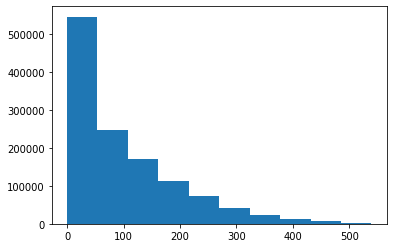

In [34]:
from sklearn import preprocessing

y_long = df_long['Survival months']
le = preprocessing.LabelEncoder()

import numpy as np
y_long = y_long[ y_long != 'Unknown' ].astype(int)
y_long[ y_long == 'Unknown' ]=np.nan

plt.hist( y_long )

In [35]:
print(y_long.min())
y_long.max()

0


539